# Matrix Approximation using Singular Value Decomposition (SVD)

## 1. Introduction
Matrix approximation is widely used in **dimensionality reduction, data compression, and noise reduction**.  
Instead of storing or processing a large matrix, we can approximate it using a **lower-rank** representation, preserving its most important features while reducing complexity.

A powerful technique for matrix approximation is **Singular Value Decomposition (SVD)**, which decomposes a matrix into simpler components and allows us to truncate lower significance values.

---

## 2. Singular Value Decomposition (SVD)

For any matrix \( A \in \mathbb{R}^{m \times n} \), the **Singular Value Decomposition (SVD)** is given by:

$[
A = U \Sigma V^T
]$

where:
- $( U \in \mathbb{R}^{m \times m} )$ is an **orthogonal matrix** (left singular vectors).
- $( V \in \mathbb{R}^{n \times n} )$ is an **orthogonal matrix** (right singular vectors).
- $( \Sigma \in \mathbb{R}^{m \times n} )$ is a **diagonal matrix** containing singular values \( \sigma_1, \sigma_2, ..., \sigma_r \).

The singular values are arranged in decreasing order:

$[
\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r \geq 0
]$

Each **singular value** represents the magnitude of variation in a specific direction.

---

## 3. Low-Rank Approximation using Truncated SVD

If we want to approximate \( A \) using a lower-rank matrix \( A_k \), we can **truncate** the SVD decomposition by keeping only the **top k singular values**:

$[
A_k = U_k \Sigma_k V_k^T
]$

where:
- $( U_k ) $consists of the first **k** columns of $( U \).$
- $( \Sigma_k )$ is the **k \times k** leading diagonal part of $( \Sigma ).$
- $( V_k )$ consists of the first **k** columns of $( V )$.

Thus, the best rank-\( k \) approximation of \( A \) is:

$[
A_k = \sum_{i=1}^{k} \sigma_i u_i v_i^T
]$

Instead of storing the full matrix \( A \), we only store the **top k singular values and vectors**, reducing computational cost.

---

## 4. Optimality of Truncated SVD (Eckart-Young Theorem)

The **Eckart-Young theorem** states that the truncated SVD provides the best low-rank approximation of \( A \) under the **Frobenius norm**:

$[
| A - A_k \|_F = \sqrt{\sum_{i=k+1}^{r} \sigma_i^2}
]$

This means choosing the **top k singular values** minimizes the error, making **truncated SVD optimal** for matrix approximation.

---

## 5. Applications of Matrix Approximation

### (a) Data Compression
- Large datasets, images, and text data can be **compressed** using truncated SVD.
- Example: **JPEG image compression** discards low-significance singular values.

### (b) Dimensionality Reduction (PCA)
- **Principal Component Analysis (PCA)** uses SVD to project data onto a lower-dimensional space.
- Reduces computational cost while preserving meaningful information.

### (c) Noise Reduction
- Small singular values correspond to noise and can be removed.

### (d) Recommendation Systems
- Used in **collaborative filtering** (e.g., **Netflix recommendations**) to approximate user-item rating matrices.

---

## 6. Example: Approximating an Image using SVD

Consider an image represented as a **grayscale matrix** \( A \). The goal is to approximate the image using fewer singular values.

### **Step 1: Compute SVD**
Compute the **full SVD** of the image matrix \( A \):

$[
A = U \Sigma V^T
]$

### **Step 2: Keep Only Top k Singular Values**
Choose \( k \) such that we retain **most of the energy** in the matrix:

$[
A_k = U_k \Sigma_k V_k^T
]$

where $( k )$ is the number of singular values retained.



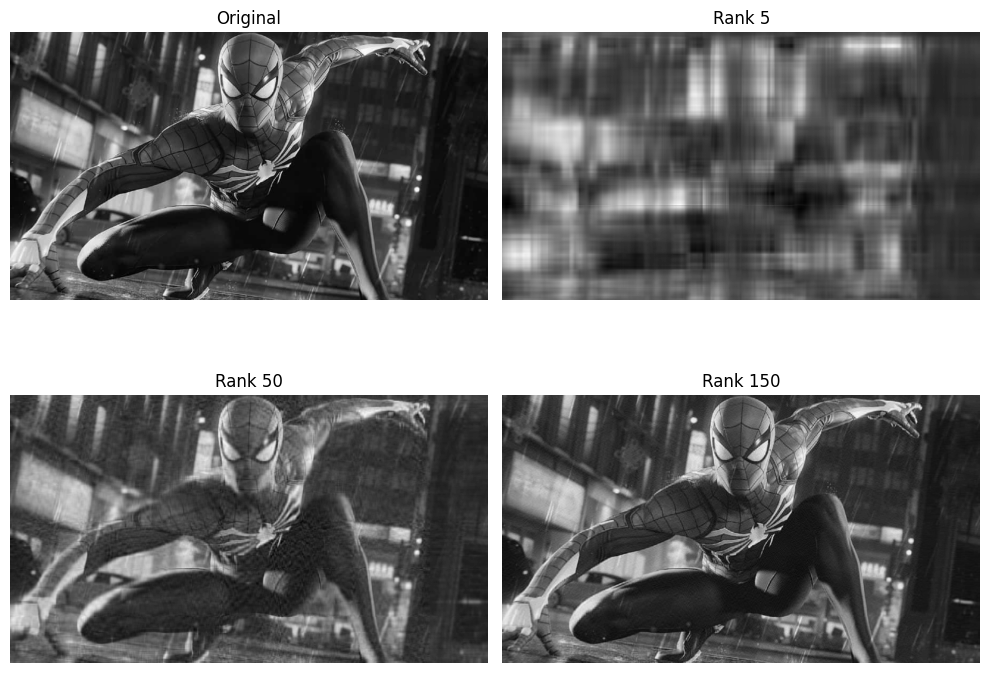

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


image = cv2.imread('spiderman-pictures.jpg', cv2.IMREAD_GRAYSCALE)
U, S, Vt = np.linalg.svd(image, full_matrices=False)


approximations = [("Original", image),
                  ("Rank 5", U[:, :5] @ np.diag(S[:5]) @ Vt[:5, :]),
                  ("Rank 50", U[:, :50] @ np.diag(S[:50]) @ Vt[:50, :]),
                  ("Rank 150", U[:, :150] @ np.diag(S[:150]) @ Vt[:150, :])]

rows, cols = 2, 2  # 2x2 grid

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

for i, (title, approx) in enumerate(approximations):
    ax = axes[i // cols, i % cols]
    ax.imshow(approx, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
